<a href="https://colab.research.google.com/github/ChetanJadhav2341/Rossmann-Sales-Prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Data and Librory**

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# **Exploring Dataset**

In [4]:
sales_df=pd.read_csv('/content/drive/MyDrive/Project-Regression/Retail Sales Prediction/Rossmann Stores Data.csv')
store_df=pd.read_csv('/content/drive/MyDrive/Project-Regression/Retail Sales Prediction/store.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**Dataset:-1**

In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


Here we se no missing valu in our dataset and our data set contains 1017209 data.


In [6]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


This dataset contains information on various stores associated with Rossmann.

It has information for sales for each day, no. of customers on that day, holidays, Promos for each day and what day of week it is.

In [7]:
print(sales_df['Date'].min(),'- start')
print(sales_df['Date'].max(), '- end')

2013-01-01 - start
2015-07-31 - end


Here we se that our all data are between 2013 to 2015


In [8]:
sales_df[sales_df.duplicated()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


No duplicate valu present in the data set.

In [9]:
sales_df['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

Here there are so many data where store is not open .


If store is not open we can't predict sales because sales also 0 if sore are closed.So we conclude only those date where store are
open.

In [10]:
# Only consider those data which day store is open
sales_df = sales_df[(sales_df['Open'] == 1)]

In [11]:
# Dropping Open column because no need of of coloum of single valu. 
sales_df.drop(['Open'],axis = 1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844392 non-null  int64 
 1   DayOfWeek      844392 non-null  int64 
 2   Date           844392 non-null  object
 3   Sales          844392 non-null  int64 
 4   Customers      844392 non-null  int64 
 5   Promo          844392 non-null  int64 
 6   StateHoliday   844392 non-null  object
 7   SchoolHoliday  844392 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 58.0+ MB


**Dataset:-2**

In [13]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [14]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

**For competition distance can directly replace Nan by mean, because only 3 missing values.**

**For Month and year can not use mean or mode as there are many missing values. So will try different methods like ffill and backfill to not get same values for all those missing but later.**

In [15]:
# Replacing missing values in competition distance with mean
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(),inplace=True)

In [16]:
# Replacing Nan with 0 in PromoInterval col.
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

## **EDA**

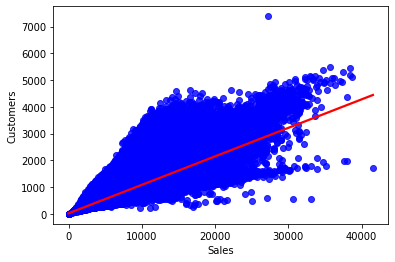

In [17]:
# How customers affect sales
sns.regplot(x=sales_df['Sales'], y=sales_df['Customers'],scatter_kws={"color": "blue"}, line_kws={"color": "red"})

**Our target variable is sales when we compare with no of customer here we see when no of customer increase no of sales also increase**

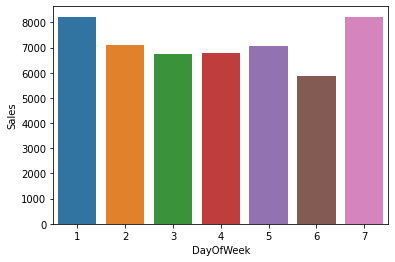

In [18]:
# How Sales differ in each day of week
Avg_week_sales = pd.DataFrame(sales_df.groupby('DayOfWeek').agg({'Sales':'mean'}))
sns.barplot(x=Avg_week_sales.index, y = Avg_week_sales['Sales'])

In the sale on day wise we se monday and sunday .Other are almos close .


so day is not a good factor ..it remain constat every day.


**But if we se in day of sunday many store are closed but still it shows sale of sunday is high in compare of other day so we can say peole mos go to store on sunday**

**High sales in starting of week. On Sunday only some stores are open and they are making great Sale.**

In [19]:
# Store open on Sunday
len(sales_df[(sales_df['DayOfWeek']==7)]['Store'].unique())

33

**Among 1115 stores only 32 stores open in sunday but still the total sale is high in compare to other day.**

How sales differ with Promo

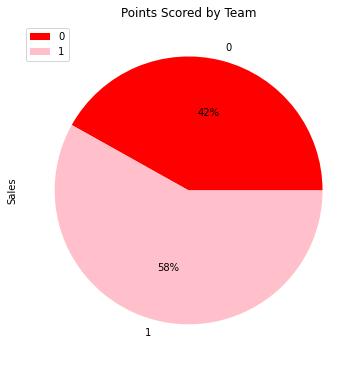

In [20]:
Avg_Promo_sales = pd.DataFrame(sales_df.groupby('Promo')['Sales'].mean())
Avg_Promo_sales.plot(kind='pie', y='Sales', autopct='%1.0f%%',
                     colors = ['red', 'pink'],
                     title='Points Scored by Team',figsize=(6,10))

Sales on Holidays and Holiday Counts

Text(0, 0.5, 'Counts')

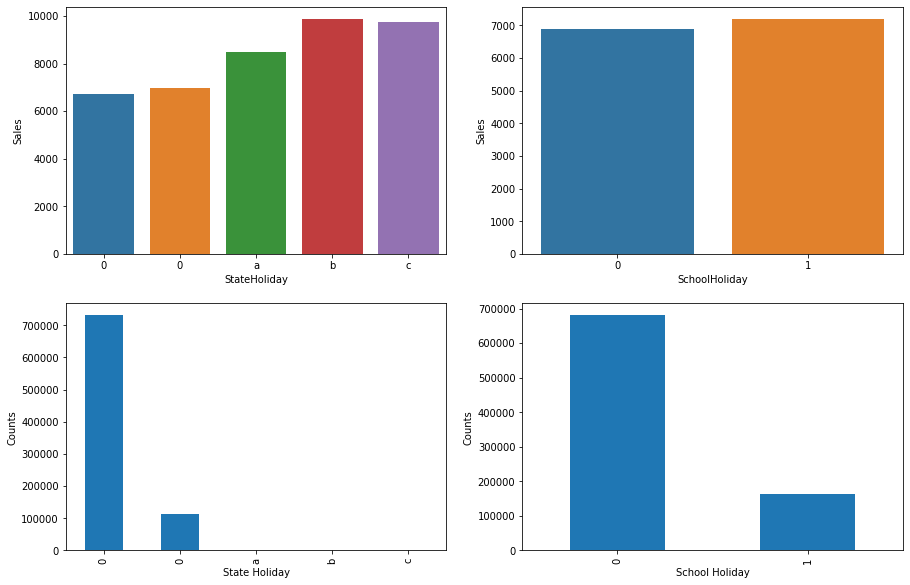

In [21]:
Avg_StateHoliday_sales = pd.DataFrame(sales_df.groupby('StateHoliday')['Sales'].mean())
Avg_SchoolHoliday_sales = pd.DataFrame(sales_df.groupby('SchoolHoliday')['Sales'].mean())

# How sales differ in holidays

fig, ax = plt.subplots(2,2,figsize=(15,10))
ax1=plt.subplot(2, 2,1)
sns.barplot(x=Avg_StateHoliday_sales.index, y = Avg_StateHoliday_sales['Sales'])
ax1=plt.subplot(2, 2,2)
sns.barplot(x=Avg_SchoolHoliday_sales.index, y = Avg_SchoolHoliday_sales['Sales'])

# plotting data on chart

# How many Total School and State holidays

ax1=plt.subplot(2, 2,4)
sales_df['SchoolHoliday'].value_counts().plot(kind='bar')
plt.xlabel('School Holiday')
plt.ylabel('Counts')
ax1=plt.subplot(2, 2,3)
sales_df['StateHoliday'].value_counts().plot(kind='bar')
plt.xlabel('State Holiday')
plt.ylabel('Counts')

NO much difference in sales on School Holidays. On state holidays all stores are to be closed except few.

But for state holidays we have two 0 columns and others are strings. So will convert all of them to numerical.

Also count for state holidays is less. So will aggregate all State Holidays as 1.

In [22]:

def num_state_holidays(string):
  if (string == 'a') | (string == 'b') | (string == 'c'):
    return 1
  else:
    return 0

In [23]:
sales_df['StateHoliday'] = sales_df['StateHoliday'].apply(num_state_holidays)

As for our dataset 3 type of holiday but we combine all and take all as holy day and other as not holiday. holiday as 1 else 0

In [24]:
sales_df['StateHoliday'].value_counts()

0    843482
1       910
Name: StateHoliday, dtype: int64

**We have gone through all features initially and have see how sales differ for  all of them.**

## **Avg Sales and Customer Data Set**

In [25]:
avg_sales_df =pd.DataFrame(sales_df.groupby('Store')['Customers','Sales'].mean())

<ipython-input-25-5e245c6c47d2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_sales_df =pd.DataFrame(sales_df.groupby('Store')['Customers','Sales'].mean())


Our goal is to predict sales day wise so we consider avg sales perday so we predict the sales per day .

In 2nd we have avg coustumber to a store .

If we consider sum of sales then it predict sales store wise in a yr.

In [26]:
avg_sales_df

,Customers,Sales
Store,,
1,564.049936,4759.096031
2,583.998724,4953.900510
3,750.077022,6942.568678
4,1321.752551,9638.401786
5,537.340180,4676.274711
...,...,...
1111,451.711168,5251.702182
1112,838.608472,10236.577664
1113,717.029337,6627.859694


In [27]:
avg_sales_df.columns = ['Avg customers','Avg sales']

In [28]:
avg_sales_df

,Avg customers,Avg sales
Store,,
1,564.049936,4759.096031
2,583.998724,4953.900510
3,750.077022,6942.568678
4,1321.752551,9638.401786
5,537.340180,4676.274711
...,...,...
1111,451.711168,5251.702182
1112,838.608472,10236.577664
1113,717.029337,6627.859694


# Dataset:-2

**Different kind of store model**

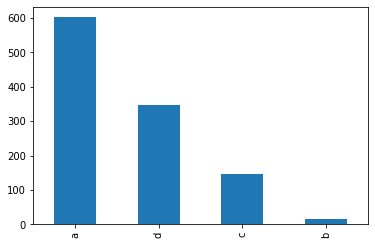

In [29]:
# Different kind of store model
store_df['StoreType'].value_counts().plot(kind='bar')

There are 4 type of model..There are very less no of data for store b ..And in top a ,store high no of data.

# **Assortment**

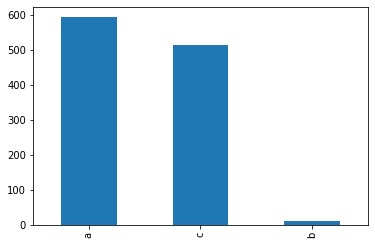

In [30]:
#Assortment 
store_df['Assortment'].value_counts().plot(kind='bar')

In assortment also b is so low in comapre to a and c.

Assortment - describes an assortment level: a = basic, b = extra, c = extended

So here we know that thre are either basic or exended but less of extra

# **Promo2**

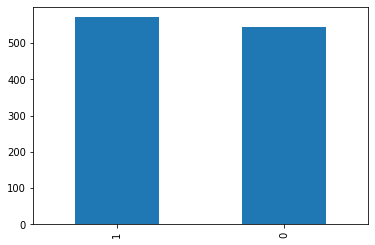

In [31]:
store_df['Promo2'].value_counts().plot(kind='bar')

# **PROMO INTERVAL counts**

In [32]:
#PROMO INTERVAL
store_df['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew

Here 3 different prmointerval and jan,apr,july oct is high in compare to both .

Here we conclude that 2 months interval for promo is high.

In [33]:
len(store_df['Store'].unique())

1115

# **Merge dataset**

In [34]:
# Merging avg sales dataset with store df
store_df = pd.merge(store_df,avg_sales_df, on = 'Store', how = 'left')

In [35]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 1114
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
 10  Avg customers              1115 non-null   float64
 11  Avg sales                  1115 non-null   float64
dtypes: float64(7), int64(2), object(3)
memory usage: 113.2+ KB


In [36]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Avg customers,Avg sales
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,564.049936,4759.096031
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",583.998724,4953.900510
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",750.077022,6942.568678
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,1321.752551,9638.401786
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,537.340180,4676.274711


# **Final Data Set**

# Now we already have unique stores in both datasets, so can merge both data sets and draw some meanigful insights from that.

In [37]:
# Mrging both DFs
Final_df = pd.merge(sales_df,store_df, on = 'Store', how = 'left')

In [38]:
# Shape of final dataset
Final_df.shape

(844392, 19)

# EDA and re-arranging Final Dataset

In [39]:
# If store is open and there is no sale
len(Final_df[(Final_df['Sales'] == 0)])

54

There are very few observations where Sales is 0. This can be a possibility that on certain
days there was no Sale.


# **Feature Eng**

In [40]:
# One hot encoding
Final_df = pd.get_dummies(Final_df, columns=['StoreType','PromoInterval', 'Assortment'], prefix=['StoreType','PromoInterval', 'Assortment'])

Date columns to Date time and extract month and year.

In [41]:
import datetime

In [42]:
# Seperating month, year and day from date.
Final_df['Month'] = pd.DatetimeIndex(Final_df['Date']).month
Final_df['Year'] = pd.DatetimeIndex(Final_df['Date']).year
Final_df['Day'] = pd.DatetimeIndex(Final_df['Date']).day

In [43]:
# Dropping original Date column. 
#Final_df.drop(['Date'],axis = 1, inplace=True)

Now we will find Total competition months by aggregating 'Total_competition_year' and 'Total_competition_months' for each obsservation.

In [44]:
Final_df['Total_competition_year'] = Final_df['Year'] - Final_df['CompetitionOpenSinceYear']

In [45]:
Final_df['Total_competition_months'] = (Final_df['Total_competition_year']*12) - (Final_df['CompetitionOpenSinceMonth'] - 1) + (Final_df['Month'])

In [46]:
# Removing both original columns
Final_df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 'Total_competition_year'],axis = 1, inplace=True)

Doing Same for Promo as well.

In [47]:
Final_df['Total_promo_years'] = Final_df['Year'] - Final_df['Promo2SinceYear']

In [48]:
Final_df['Total_promo_weeks'] = (Final_df['Total_promo_years']*52) - (Final_df['Promo2SinceWeek']-1) + (Final_df['Month']*4)

In [49]:
# Removing both original columns
Final_df.drop(['Total_promo_years', 'Promo2SinceYear', 'Promo2SinceWeek'],axis = 1, inplace=True)

Now we will replace null values in both this columns to get a complete dataset.

In [50]:
# Replacing Nan with 0 in below cols.
Final_df.update(Final_df[['Total_promo_weeks']].fillna(0))

In [51]:
# Replacing missing values in Competition open since month by ffill, limit = 2
Final_df.fillna(method='ffill', limit = 1, inplace = True)

In [52]:
# Replacing missing values in Competition open since month by ffill, limit = 2
Final_df.fillna(method='backfill', limit = 2, inplace = True)

In [53]:
# Filling rest values with mean
Final_df['Total_competition_months'].fillna(Final_df['Total_competition_months'].mean(),inplace=True)

In [54]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Store                           844392 non-null  int64  
 1   DayOfWeek                       844392 non-null  int64  
 2   Date                            844392 non-null  object 
 3   Sales                           844392 non-null  int64  
 4   Customers                       844392 non-null  int64  
 5   Promo                           844392 non-null  int64  
 6   StateHoliday                    844392 non-null  int64  
 7   SchoolHoliday                   844392 non-null  int64  
 8   CompetitionDistance             844392 non-null  float64
 9   Promo2                          844392 non-null  int64  
 10  Avg customers                   844392 non-null  float64
 11  Avg sales                       844392 non-null  float64
 12  StoreType_a     

At the end we have a complete dataset with no missing values.

# **EDA of 2nd DF with Final DF and Distributions**

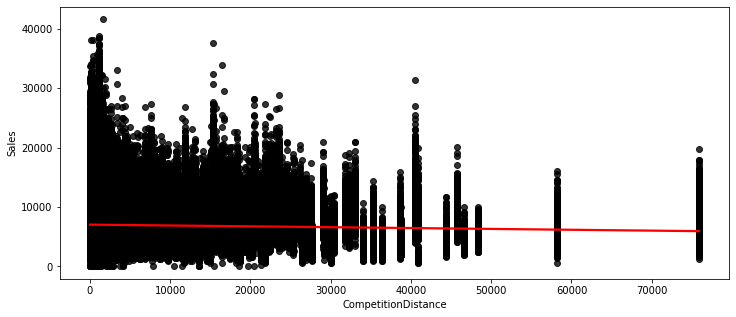

In [55]:
plt.rcParams['figure.figsize'] = (12, 5)
sns.regplot(x=Final_df['CompetitionDistance'], y = Final_df['Sales'],scatter_kws={"color": "black"}, line_kws={"color": "red"})

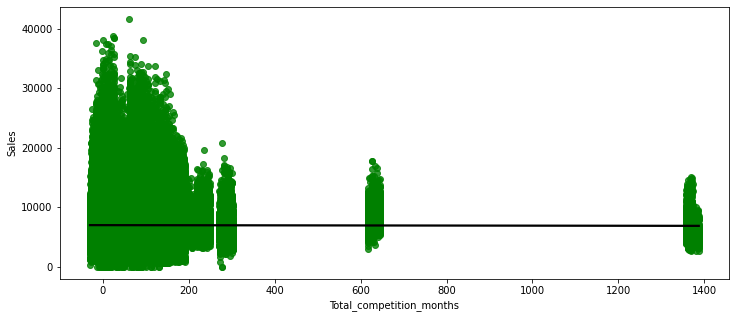

In [56]:
sns.regplot(x=Final_df['Total_competition_months'], y = Final_df['Sales'],scatter_kws={"color": "green"}, line_kws={"color": "black"})

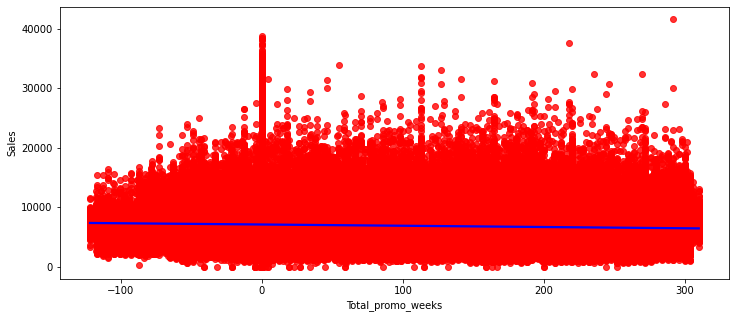

In [57]:
sns.regplot(x=Final_df['Total_promo_weeks'], y = Final_df['Sales'],scatter_kws={"color": "red"}, line_kws={"color": "blue"})

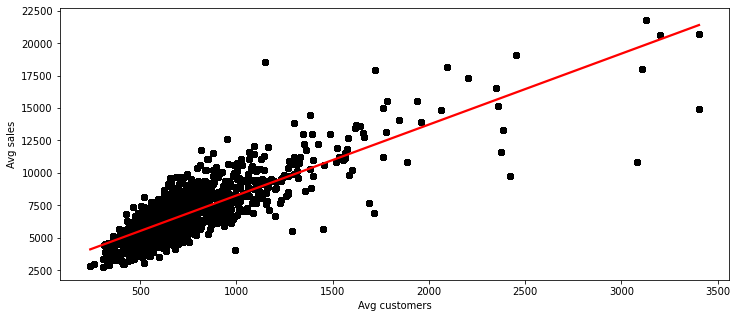

In [58]:
sns.regplot(x=Final_df['Avg customers'], y = Final_df['Avg sales'],scatter_kws={"color": "black"}, line_kws={"color": "red"})

Distributions

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

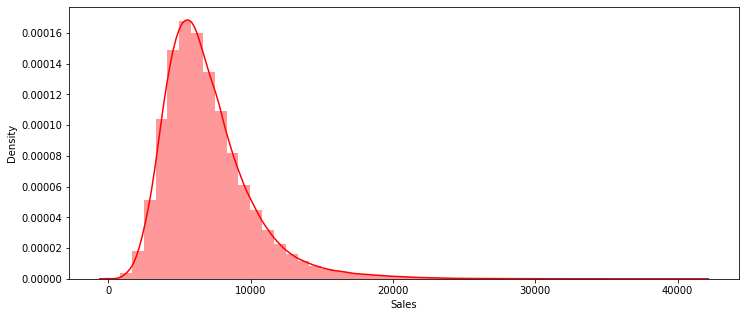

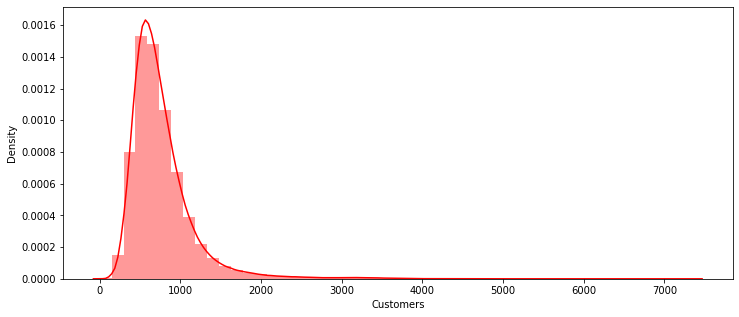

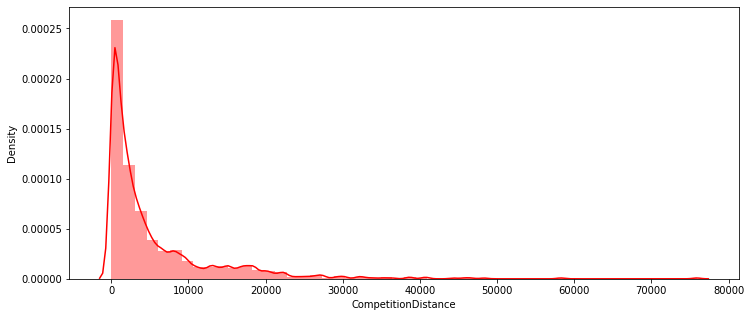

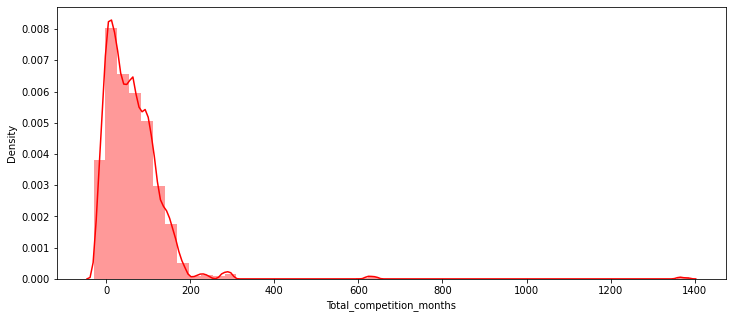

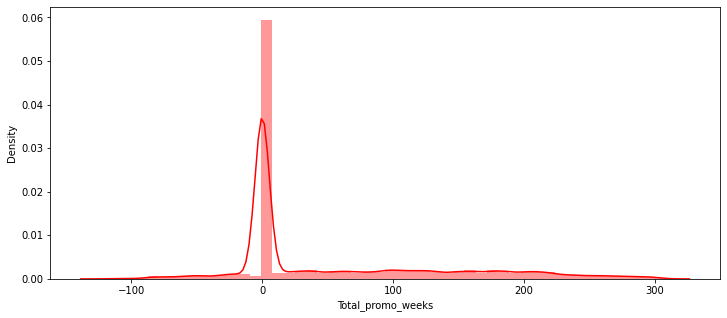

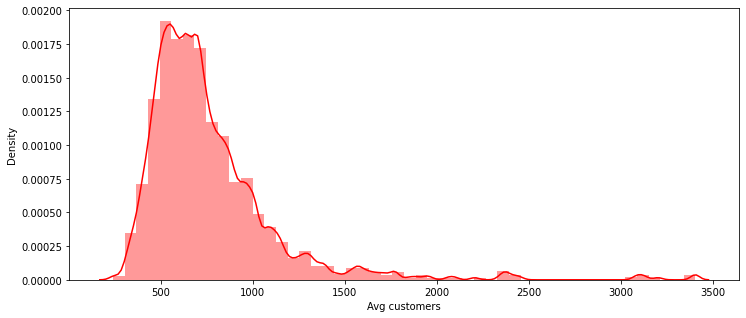

In [59]:
 # Distributions
for col in ['Sales', 'Customers', 'CompetitionDistance', 'Total_competition_months','Total_promo_weeks', 'Avg customers']:
  plt.figure()
  sns.distplot(Final_df[col], color='r')

In [60]:
Final_df.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,...,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Assortment_a,Assortment_b,Assortment_c,Month,Year,Day,Total_competition_months,Total_promo_weeks
0,1,5,2015-07-31,5263,555,1,0,1,1270.0,0,...,0,0,1,0,0,7,2015,31,83.0,0.0
1,2,5,2015-07-31,6064,625,1,0,1,570.0,1,...,1,0,1,0,0,7,2015,31,93.0,276.0
2,3,5,2015-07-31,8314,821,1,0,1,14130.0,1,...,1,0,1,0,0,7,2015,31,104.0,223.0


sales over time change

In [61]:
# Assign Date column to Date(Year-Month) instead of (Year-Month-Day)
# this column will be useful in analysis and visualization
Final_df['Date'] = Final_df['Date'].apply(lambda x: (str(x)[:7]))

In [62]:
Final_df.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,...,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Assortment_a,Assortment_b,Assortment_c,Month,Year,Day,Total_competition_months,Total_promo_weeks
0,1,5,2015-07,5263,555,1,0,1,1270.0,0,...,0,0,1,0,0,7,2015,31,83.0,0.0
1,2,5,2015-07,6064,625,1,0,1,570.0,1,...,1,0,1,0,0,7,2015,31,93.0,276.0
2,3,5,2015-07,8314,821,1,0,1,14130.0,1,...,1,0,1,0,0,7,2015,31,104.0,223.0


sales over time change

In [63]:
# Assign Date column to Date(Year-Month) instead of (Year-Month-Day)
# this column will be useful in analysis and visualization
Final_df['Date'] = Final_df['Date'].apply(lambda x: (str(x)[:7]))

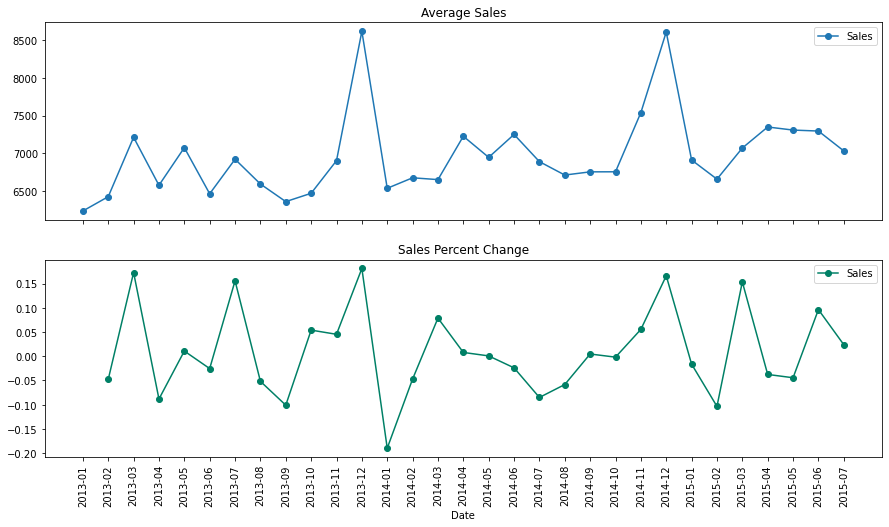

In [64]:
# group by date and get average sales, and precent change
average_sales    = Final_df.groupby('Date')["Sales"].mean()
pct_change_sales = Final_df.groupby('Date')["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average sales over time(year-month)
ax1 = average_sales.plot(legend=True,ax=axis1,marker='o',title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)

# plot precent change for sales over time(year-month)
ax2 = pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Sales Percent Change")
# ax2.set_xticks(range(len(pct_change_sales)))
# ax2.set_xticklabels(pct_change_sales.index.tolist(), rotation=90)

In [65]:
Final_df.drop(['Date','Store', 'Customers', 'Year'], axis = 1, inplace =True)

corelation

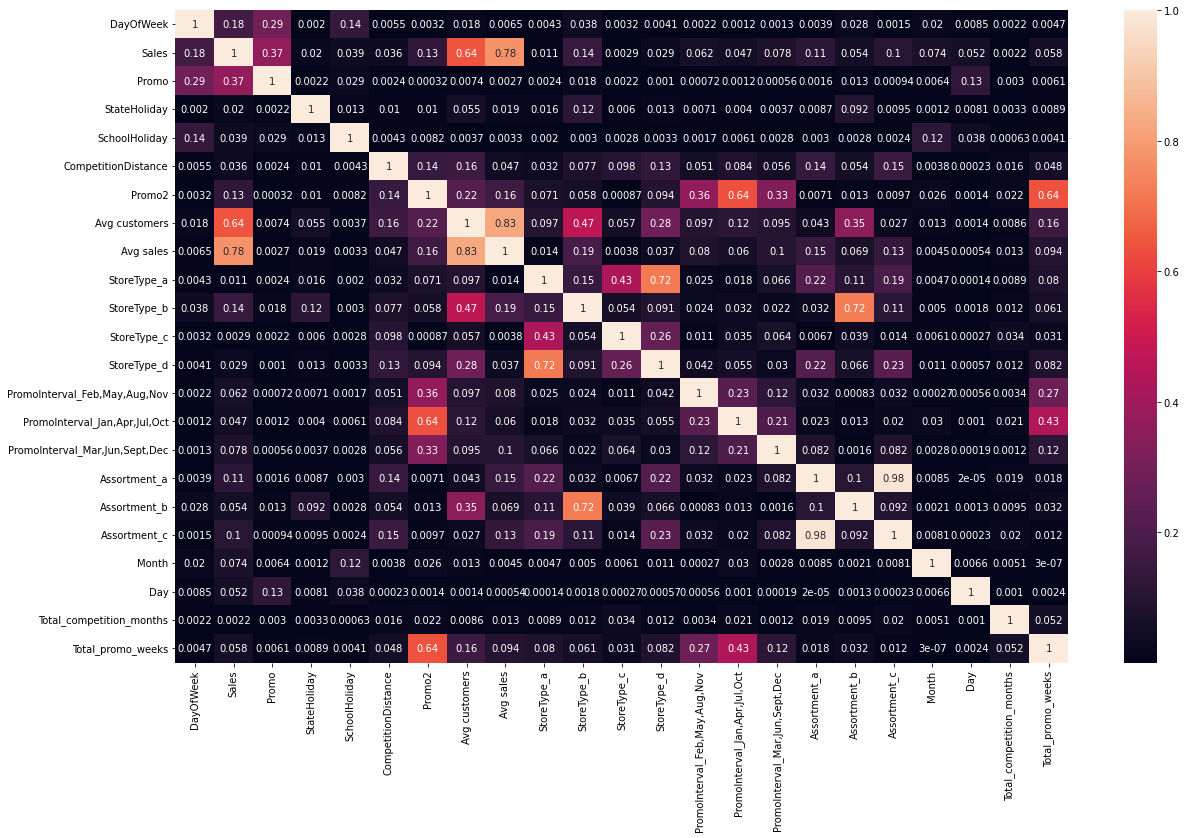

In [66]:
plt.subplots(figsize=(20,12))
sns.heatmap(Final_df.corr().abs(), annot=True)

saved Final Dataset.

In [67]:
# Saving Final DF
Final_df.to_csv('/content/drive/MyDrive/Project-Regression/Retail Sales Prediction'+ 'Final_dataset.csv', index= False)

In [68]:
# Importing saved DF
Final_df_saved = pd.read_csv('/content/drive/MyDrive/Project-Regression/Retail Sales Prediction/Final_dataset.csv')

In [69]:
Final_df_saved.shape

(844392, 23)

In [70]:
Final_df

,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Avg customers,Avg sales,StoreType_a,...,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Assortment_a,Assortment_b,Assortment_c,Month,Day,Total_competition_months,Total_promo_weeks
0,5,5263,1,0,1,1270.0,0,564.049936,4759.096031,0,...,0,0,0,1,0,0,7,31,83.0,0.0
1,5,6064,1,0,1,570.0,1,583.998724,4953.900510,1,...,0,1,0,1,0,0,7,31,93.0,276.0
2,5,8314,1,0,1,14130.0,1,750.077022,6942.568678,1,...,0,1,0,1,0,0,7,31,104.0,223.0
3,5,13995,1,0,1,620.0,0,1321.752551,9638.401786,0,...,0,0,0,0,0,1,7,31,71.0,0.0
4,5,4822,1,0,1,29910.0,0,537.340180,4676.274711,1,...,0,0,0,1,0,0,7,31,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,2,3375,0,1,1,150.0,0,1758.842887,11207.408705,0,...,0,0,0,1,0,0,1,1,77.0,0.0
844388,2,10765,0,1,1,860.0,0,3403.458599,14933.288747,0,...,0,0,0,0,1,0,1,1,160.0,0.0
844389,2,5035,0,1,1,840.0,1,3081.052017,10825.902335,0,...,0,1,0,0,1,0,1,1,160.0,9.0
844390,2,4491,0,1,1,1430.0,0,1712.427802,6936.760776,0,...,0,0,0,0,1,0,1,1,131.0,0.0


**Train test split**

In [71]:
# X and Y
X = Final_df_saved.drop(['Sales'], axis = 1)
y = Final_df_saved['Sales']

In [72]:
# Copy of DataFrame
LR_df = Final_df_saved.copy()

In [73]:
# Import Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression, LassoCV
from sklearn.metrics import r2_score, mean_squared_error, make_scorer

In [74]:
LR_df['Sales'] = np.sqrt(LR_df['Sales'])
LR_df['Avg customers'] = np.sqrt(LR_df['Avg customers'])
LR_df['CompetitionDistance'] = np.sqrt(LR_df['CompetitionDistance'])
#LR_df['Total_competition_months'] = np.log(LR_df['Total_competition_months'])

In [75]:
# X and Y
X = LR_df.drop(['Sales'], axis = 1)
y = LR_df['Sales']

# **Implementing Modal**

• Linear Regression (Baseline Model)

• Lasso (Hyperparameter)

• Decision tree by using decision tree regressor (Hyperparameter)

• Random forest regressor

• Gradient Boosting Regression

• Xg boost regressor (Hyperparameter)


## **Linear Regression**

In [76]:
# Train Test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [77]:
x_train

,DayOfWeek,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Avg customers,Avg sales,StoreType_a,StoreType_b,...,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Assortment_a,Assortment_b,Assortment_c,Month,Day,Total_competition_months,Total_promo_weeks
113235,1,1,0,1,13.416408,1,31.276414,8320.129243,1,0,...,0,1,0,1,0,0,3,30,47.0,112.0
550304,3,0,0,0,20.493902,1,28.140012,7841.691026,1,0,...,0,1,0,1,0,0,11,13,-7.0,135.0
232565,5,1,0,0,65.574385,1,22.026067,5084.703466,1,0,...,0,1,0,1,0,0,11,14,69.0,70.0
770637,3,1,0,0,43.817805,0,23.331035,5518.541026,0,0,...,0,0,0,0,0,1,3,20,96.0,0.0
247333,6,0,0,1,102.956301,1,19.594154,5049.653009,0,0,...,1,0,0,0,0,1,10,25,112.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84434,6,0,0,0,129.151074,1,26.255028,8685.312420,1,0,...,0,1,0,1,0,0,5,2,111.0,296.0
437782,5,0,0,0,17.320508,0,20.334009,2936.290816,0,0,...,0,0,0,1,0,0,3,14,96.0,0.0
620104,5,1,0,0,14.491377,0,48.706223,11643.638412,0,1,...,0,0,0,0,1,0,8,30,38.0,0.0
203245,6,0,0,0,28.809721,1,22.959444,4356.482166,1,0,...,0,1,0,0,0,1,12,20,115.0,74.0


In [78]:
train={}
test={}

In [79]:
# linier regratation

reg=LinearRegression()

In [80]:
reg=reg.fit(x_train, y_train)

In [81]:
y_pred_train=reg.predict(x_train)
y_pred_test= reg.predict(x_test)

In [82]:
print(y_pred_train)
print(y_pred_test)

[ 97.38862655  82.5780952   78.40065756 ... 114.72874698  61.19416045
  94.04997593]
[70.92312314 86.43364253 69.40763394 ... 88.05223791 81.76177888
 76.32709932]


In [83]:
len(x_train.columns)

22

In [84]:
# matrics for linear Regression for train datast
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_train, y_pred_train)
print('MsE :- ', MSE)

RMSE = np.sqrt(MSE)
print('RMSE :- ', RMSE)

from sklearn.metrics import r2_score
r2=r2_score(y_train, y_pred_train)
print('r2_score :- ', r2)


Adjusted_r2 =1-(1-r2_score(y_train, y_pred_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted_r2 :- ',Adjusted_r2)
train['Linier regreson']=MSE,RMSE,r2,Adjusted_r2

MsE :-  76.56544842613545
RMSE :-  8.750168479871427
r2_score :-  0.7489788542710669
Adjusted_r2 :-  0.7489461490950232


In [85]:
# matrics for linear Regression for test dataset

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred_test)
print('MSE :- ', MSE)

RMSE = np.sqrt(MSE)
print('RMSE :- ',RMSE)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred_test)
print('r2_score :- ', r2)


# Adjusted_R2 = 1-(((1-r2_score)-(N-1))/(N-P-1))

Adjusted_r2=(1-(((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1)))
print('Adjusted :- ', Adjusted_r2)
test['Linier regreson']=MSE,RMSE,r2,Adjusted_r2

MSE :-  76.72953053865135
RMSE :-  8.759539402197547
r2_score :-  0.7496439881211274
Adjusted :-  0.7496113696043952


<function matplotlib.pyplot.show(*args, **kw)>

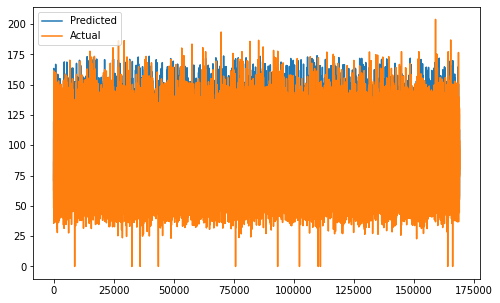

In [86]:
#compare between y_test_pred and original y_test.

plt.figure(figsize=(8,5))
plt.plot(np.array(y_pred_test))
plt.plot(np.array(y_test))
plt.legend(["Predicted", "Actual"])
plt.show

It is a good model with almost 74% accuracy on train and test dataset.

So it's not a overfitted model. But some errors.

But after all a good base model to start with.

Other metric for model evaluation would be RMSE or MSE. We would try to get lowest
RMSE score. So our error predictions are less.

# **Lasso(Hyperparameter)**

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [88]:
# imorting lasso regression model

from sklearn.linear_model import Lasso
lasso = Lasso()
parameter = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor=GridSearchCV(lasso, parameter, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.067e+07, tolerance: 1.647e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.069e+07, tolerance: 1.651e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.068e+07, tolerance: 1.648e+04

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [89]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -76.57097335796786


In [90]:
lasso=Lasso(alpha=0.001,max_iter=3000)
lasso.fit(x_train,y_train)

Lasso(alpha=0.001, max_iter=3000)

In [91]:
# lasso score
lasso.score(x_train, y_train)

0.748973799921019

In [92]:
# lasso y pred test and train
y_pred_train_lasso=lasso.predict(x_train)
y_pred_test_lasso=lasso.predict(x_test)

In [93]:
# metrics for lasso regressor flor train dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE)
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2)

#  Adjusted_r=(1-(((1-r2)(N-1))/(n-p-1)))
Adjusted_r2 = 1-(1-r2)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print(Adjusted_r2)
train['lasso']=MSE,RMSE,r2,Adjusted_r2

MSE : 76.56699008342012
RMSE : 8.750256572433754
R2 : 0.748973799921019
0.7489410940864514


In [94]:
# metrics for ridge regression for test
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE)
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_lasso)
print("R2 :",r2)
Adjusted_r2=1-(1-r2)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2",Adjusted_r2 )
test['lasso']=MSE,RMSE,r2,Adjusted_r2

MSE : 76.73257963444337
RMSE : 8.759713444767664
R2 : 0.7496340394161508
Adjusted R2 0.7496014196032165


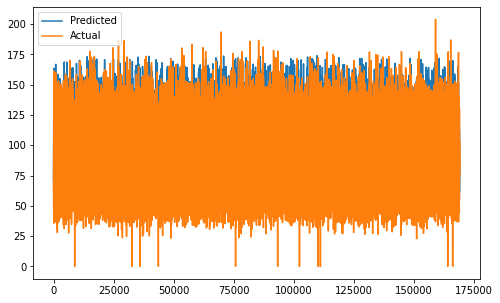

In [95]:
plt.figure(figsize=(8,5))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **Decision tree by using decision tree regressor(Hyperparameter)**

In [96]:
from sklearn.tree import DecisionTreeRegressor
reg_decision_model=DecisionTreeRegressor()
parameters={"splitter":["best","random"],
            "max_depth" : [7,10,18,20,25]}

          # "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
          # "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
          # "max_features":["auto","log2","sqrt",None],
          # "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters, scoring="neg_mean_squared_error",cv=3, verbose=3)
tuning_model.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ......max_depth=7, splitter=best;, score=-60.270 total time=   2.0s
[CV 2/3] END ......max_depth=7, splitter=best;, score=-60.560 total time=   2.0s
[CV 3/3] END ......max_depth=7, splitter=best;, score=-59.657 total time=   2.0s
[CV 1/3] END ....max_depth=7, splitter=random;, score=-72.826 total time=   1.1s
[CV 2/3] END ....max_depth=7, splitter=random;, score=-71.261 total time=   1.1s
[CV 3/3] END ....max_depth=7, splitter=random;, score=-72.541 total time=   1.0s
[CV 1/3] END .....max_depth=10, splitter=best;, score=-49.015 total time=   2.8s
[CV 2/3] END .....max_depth=10, splitter=best;, score=-48.609 total time=   2.8s
[CV 3/3] END .....max_depth=10, splitter=best;, score=-48.756 total time=   2.7s
[CV 1/3] END ...max_depth=10, splitter=random;, score=-60.855 total time=   1.5s
[CV 2/3] END ...max_depth=10, splitter=random;, score=-64.790 total time=   1.4s
[CV 3/3] END ...max_depth=10, splitter=random;, 

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [7, 10, 18, 20, 25],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [7, 10, 18, 20, 25],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [98]:
#importing the decision tree model for training
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=10,
                                           max_features=None, max_leaf_nodes=80,splitter='best')

decision_regressor.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse', max_depth=10, max_leaf_nodes=80)

In [99]:
DecisionTreeRegressor(criterion='mse', max_depth=10, max_leaf_nodes=80)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_leaf_nodes=80)

In [100]:
#y pred for test and train data
y_pred_train_dt = decision_regressor.predict(x_train)
y_pred_test_dt = decision_regressor.predict(x_test)

In [101]:
#metric for decison tree for train data
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(x_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_dt)
print("MSE :",MSE)
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_dt)
print("R2 :",r2)
Adjusted_r2 = 1-((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1)
print(Adjusted_r2)
train['decison_tree']=MSE,RMSE,r2,Adjusted_r2

Model Score: 0.7983661933144772
MSE : 61.501523235882246
RMSE : 7.842290688050415
R2 : 0.7983661933144772
0.7983399227422318


In [102]:
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_test, y_pred_test_dt)
print("MSE :",MSE)
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_test_dt))
print("R2 :",r2)
Adjusted_r2=1-((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1)
print(Adjusted_r2)
test['decision_tree']=MSE,RMSE,r2,Adjusted_r2

MSE : 61.517504650882856
RMSE : 7.84330954705237
R2 : 0.7992783610558276
0.7992522093285761


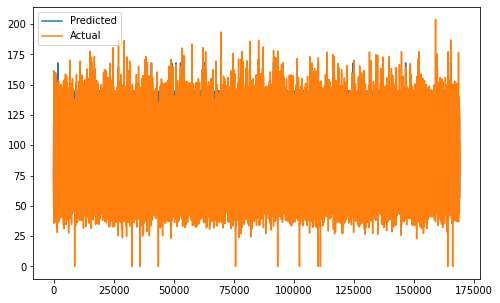

In [103]:
#pred vs actual for decision tree
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_dt)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **Random forest Rergressor**

In [104]:
# Hyperparameter Tunning 

from sklearn.ensemble import RandomForestRegressor


# random_forest=RandomForestRegressor() # For GBM, use GradientBoostingClassifier()
# grid_values = {'n_estimators':[50, 80, 100], 'max_depth':[3, 5, 7]}
# #n_estimators=no of trees
# #max_depth=How much maximum depth the d-tree is goes
# random_forest= GridSearchCV(random_forest, param_grid = grid_values, scoring = 'roc_auc', cv=5)
# # Fit the object to train dataset
# random_forest.fit(x_train, y_train)
#creating an instance for the random forest

rf_model=RandomForestRegressor()
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [105]:
# print(rf_model.best_params_)
# rf_model.best_score_

In [106]:
y_pred_train_rf = rf_model.predict(x_train)
y_pred_test_rf = rf_model.predict(x_test)

In [107]:
# calculate performance matrics

from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_train, y_pred_train)
print("MSE :- ",MSE)

RMSE= np.sqrt(MSE)
print("RMSE:- ",RMSE)

from sklearn.metrics import r2_score
r2=r2_score(y_train, y_pred_train)
print("r2_score:- ", r2_score)

# Adjusted_r2=1-((1-r2)*(N-1))/(N-P-1)
Adjusted_r2=1-((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted_r2",Adjusted_r2)
train['rf_model']=MSE,RMSE,r2,Adjusted_r2

MSE :-  76.56544842613545
RMSE:-  8.750168479871427
r2_score:-  <function r2_score at 0x7f55654fbd30>
Adjusted_r2 0.7489461490950232


In [108]:
# test random forest

MSE= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE)
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_rf)
print("R2 :",r2)
Adjusted_r2=1-((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted_r2",Adjusted_r2)
test['rf_model']=MSE,RMSE,r2,Adjusted_r2

MSE : 19.719161798764723
RMSE : 4.440626284519417
R2 : 0.9356595736885669
Adjusted_r2 0.9356511908690115


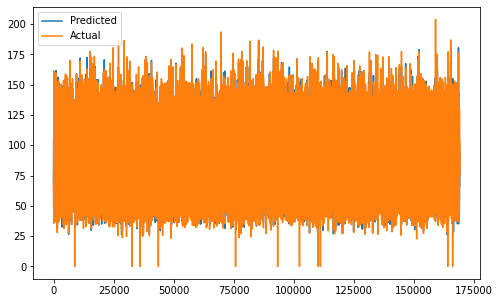

In [109]:
#pred vs actual for random forest
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_rf)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **Gradient Boosting Regression**

In [110]:
from sklearn.ensemble import GradientBoostingRegressor
gbd_model=GradientBoostingRegressor()
gbd_model.fit(x_train, y_train)

GradientBoostingRegressor()

In [111]:
parameters = {'learning_rate': [0.01,0.04],
              # 'subsample' : [0.9, 0.5, 0.2, 0.1],
              #'min_child_weight': [10,15],

              'n_estimators' : [100,500],
              'max_depth' : [6,8,10]
              }

In [112]:
y_pred_train_gb = gbd_model.predict(x_train)
y_pred_test_gb = gbd_model.predict(x_test)

In [113]:
# # Making predictions on train and test data
# y_pred_train_gb = gb_optimal_model.predict(x_train)
# y_pred_test_gb = gb_optimal_model.predict(x_test)

In [114]:
#metrics for rf score with gd for train
from sklearn.metrics import mean_squared_error
print("Model Score:",gbd_model.score(x_train,y_train))
MSE= mean_squared_error(y_train,y_pred_train_gb)
print("MSE :",MSE)
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_gb)
print("R2 :",r2)
# Adjusted_r2=1-((1-r2)*(N-1))/(N-P-1)
Adjusted_r2=1-((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted_r2",Adjusted_r2)
train['GB']=MSE,RMSE,r2,Adjusted_r2

Model Score: 0.8414034049903093
MSE : 48.37448805563131
RMSE : 6.9551770686037395
R2 : 0.8414034049903093
Adjusted_r2 0.8413827416731028


In [115]:
#metrics for rf score with gd for test
from sklearn.metrics import mean_squared_error
print("Model Score:",gbd_model.score(x_test,y_test))
MSE= mean_squared_error(y_test, y_pred_test_gb)
print("MSE :",MSE)
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_gb)
print("R2 :",r2)
# Adjusted_r2=1-((1-r2)*(N-1))/(N-P-1)
Adjusted_r2=1-((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted_r2",Adjusted_r2)
test['GB']=MSE,RMSE,r2,Adjusted_r2

Model Score: 0.8422366206397912
MSE : 48.3515851832497
RMSE : 6.9535304114708305
R2 : 0.8422366206397912
Adjusted_r2 0.8422160658810268


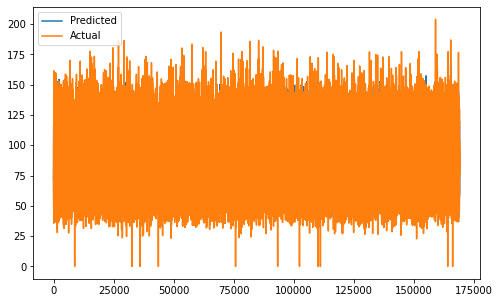

In [116]:
#pred vs actual for Gradient boosting
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_gb)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **Xgboost Regressor**

In [117]:
import xgboost as xgb
xg_model=xgb.XGBRegressor()

parameter = { 'max_depth':[8],
            'min_child_weight': [15],
            'n_estimators': [100]}

In [118]:
xg_regression = GridSearchCV(xg_model, param_grid=parameter,scoring="roc_auc", cv=5, verbose=3)
xg_regression.fit(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[12:01:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 1/5] END max_depth=8, min_child_weight=15, n_estimators=100;, score=nan total time= 2.5min
[12:03:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 2/5] END max_depth=8, min_child_weight=15, n_estimators=100;, score=nan total time= 2.5min
[12:06:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 3/5] END max_depth=8, min_child_weight=15, n_estimators=100;, score=nan total time= 2.5min
[12:08:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 4/5] END max_depth=8, min_child_weight=15, n_estimators=100;, score=nan total time= 2.5min
[12:11:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


[CV 5/5] END max_depth=8, min_child_weight=15, n_estimators=100;, score=nan total time= 2.5min
[12:14:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'max_depth': [8], 'min_child_weight': [15],
                         'n_estimators': [100]},
             scoring='roc_auc', verbose=3)

In [119]:
xg_regression.best_params_
# xg_regression.best_estimator_

{'max_depth': 8, 'min_child_weight': 15, 'n_estimators': 100}

In [120]:
xg_regression.best_estimator_
xg_optimal_model = xg_regression.best_estimator_
# xg_grid.best_params_
# Making predictions on train and test data

In [121]:
y_pred_train_x_g = xg_optimal_model.predict(x_train)
y_pred_test_x_g = xg_optimal_model.predict(x_test)

In [122]:
#xg after training score for train data
print("Model Score:",xg_optimal_model.score(x_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_x_g)
print("MSE :",MSE)
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_train, y_pred_train_x_g)
print("R2 :",r2)
Adjusted_r2=1-((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted_r2",Adjusted_r2)
train['XGB']=MSE,RMSE,r2,Adjusted_r2

Model Score: 0.9093935348346388
MSE : 27.636415312932318
RMSE : 5.257034840376495
R2 : 0.9093935348346388
Adjusted_r2 0.9093817298514956


In [123]:
#Xg boost after training for test
print("Model Score:",xg_optimal_model.score(x_train,y_train))
MSE= mean_squared_error(y_test, y_pred_test_x_g)
print("MSE :",MSE)
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score((y_test), (y_pred_test_x_g))
print("R2 :",r2)
Adjusted_r2=1-((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted_r2",Adjusted_r2)
test['XGB']=MSE,RMSE,r2,Adjusted_r2

Model Score: 0.9093935348346388
MSE : 28.11638225839362
RMSE : 5.302488308180757
R2 : 0.9082608054388203
Adjusted_r2 0.9082488528740293


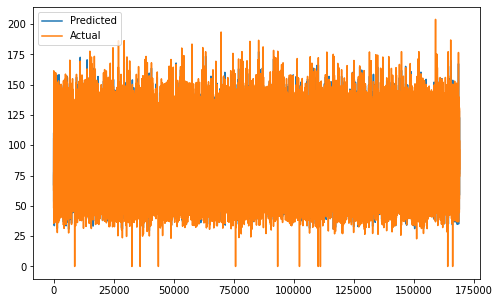

In [124]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_x_g))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **Check model**

In [125]:
Test=pd.DataFrame(test,index=["Test MSE", "Test RMSE",'Test R^2','Test Adjusted R^2'])
Train=pd.DataFrame(train,index=["Train MSE", "Train RMSE",'Train R^2','Train Adjusted R^2'])

In [126]:
Test.transpose()

,Test MSE,Test RMSE,Test R^2,Test Adjusted R^2
Linier regreson,76.729531,8.759539,0.749644,0.749611
lasso,76.732580,8.759713,0.749634,0.749601
decision_tree,61.517505,7.843310,0.799278,0.799252
GB,48.351585,6.953530,0.842237,0.842216
XGB,28.116382,5.302488,0.908261,0.908249


In [127]:
Train.transpose()

,Train MSE,Train RMSE,Train R^2,Train Adjusted R^2
Linier regreson,76.565448,8.750168,0.748979,0.748946
lasso,76.566990,8.750257,0.748974,0.748941
decison_tree,61.501523,7.842291,0.798366,0.798340
RF_model,76.565448,8.750168,0.748979,0.748946
rf_model,19.719162,4.440626,0.935660,0.935651
GB,48.374488,6.955177,0.841403,0.841383
XGB,27.636415,5.257035,0.909394,0.909382


# **Conclusion**

Random forest regressor gives us high accuracy of 93% for our test data set in case of train data it show accuracy of 99% .



Xg boost gives 90% in both train and test case both r2 score and adj r2.



In case of random forest a little bit overfit occur but in xg boost it work properly.



Our base model liner regression created a base line of accuracy of 74%.



The lasso model although we use hyper parameter it gives us similar performance like linear regression.



In case of Decision tree by using decision tree regressor (Hyperparameter) it gives us 78% accuracy in train and 79 accuracy for test case.